<h2 style = "color : Brown "> Credit EDA Assignment </h>

This is an EDA Analysis of a Loan providing Companies, which contain two Types of Loan Application :
    
-  First one is a Current Application contains information about the clients who has a payments difficulties and clients who paid their payments on time.
    
-  The Second one is, Previous Application contains information about the clients who already applied for loan before.

In [1]:
# Importing the Warning

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries which are we going to use for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

### Loading the data 

-  we have two dataset "application_data.csv" & "previous_application.csv"

#### 1) "application_data.csv"

In [3]:
df1 = pd.read_csv("application_data.csv")

In [4]:
# Assigning application_data as dataframe1 = df1

In [5]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df1.shape

(307511, 122)

In [7]:
# we can see that , there are 307511 Indexes and 122 Columns

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# So, we have 307511 indexes

# 122 columns

# datas' are in float , int , object type : 65 float type columns , 41 int type columns, 16 object type columns

In [10]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
# Now, check for missing values

In [12]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
df1.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [14]:
# Convert this missing values in percentage

In [15]:
(df1.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

### Missing Value Treatment

In [16]:
# we have lots of missing data columns, so We can remove only those columns which contain more than 40 % missing data

In [17]:
missing_values1 = (df1.isnull().mean()*100).sort_values(ascending = False)

missing_values1

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [18]:
missing_values1[missing_values1 > 40].sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [19]:
# those are missing values which is greater than 40 %

# We should drop those Columns

# Imputing for such variables can create a trouble.

In [20]:
null1 = missing_values1[missing_values1 > 40].sort_values(ascending=False)

null1

COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [21]:
null1.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE

In [22]:
# Droping these columns

In [23]:
# For Droppin, we can use inplace = True and change the current dataframe 

# or 

#  we can put those data into other variable

In [24]:
AppDf = df1.drop(columns = null1.index)


In [25]:
AppDf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# After removing those columns we have remaining 73 columns 

In [27]:
AppDf.shape

(307511, 73)

In [28]:
AppDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
# checking for null value

AppDf.isnull().sum().sort_values(ascending = False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
dtype: int64

In [30]:
# Start from those columns which contain more missing values

In [31]:
(AppDf.isnull().mean()*100).sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [32]:
missing_values1 = AppDf.isnull().mean()*100

In [33]:
missing_values1[missing_values1 > 10]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [34]:
missing_values1 = missing_values1[missing_values1 > 10]

In [35]:
missing_values1.index

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [36]:
# Let's Analyse :

# Number of enquiries to Credit Bureau

In [37]:
REQ_CREDIT_BUREAU = AppDf[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON",
                               "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]]

REQ_CREDIT_BUREAU.head(10)

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0
6,2.0,1.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
REQ_CREDIT_BUREAU.describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [39]:
REQ_CREDIT_BUREAU.mode()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
REQ_CREDIT_BUREAU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


- Analysis of " Enquiries to Credit Bureau " columns :

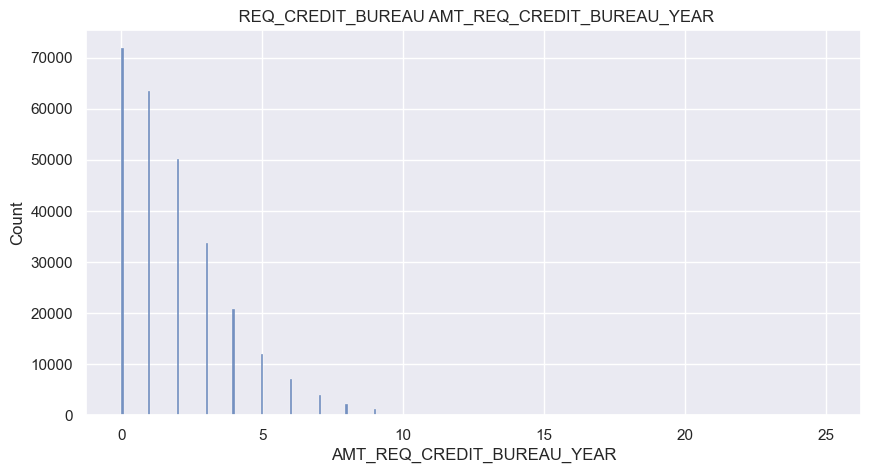

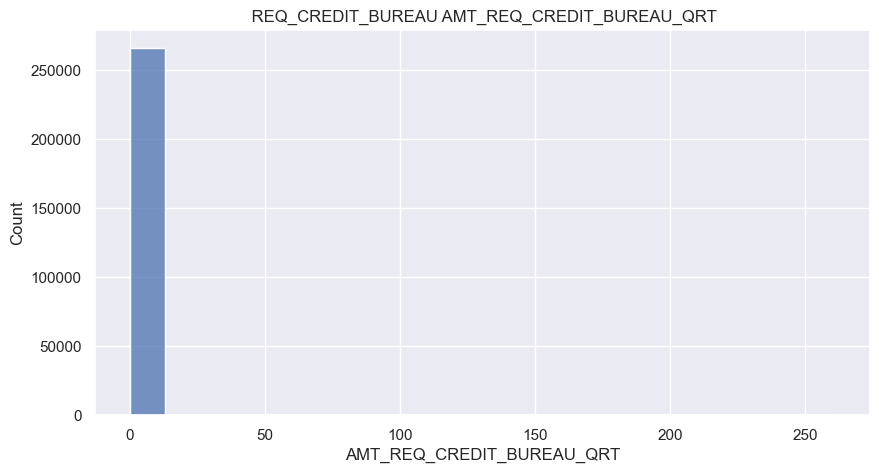

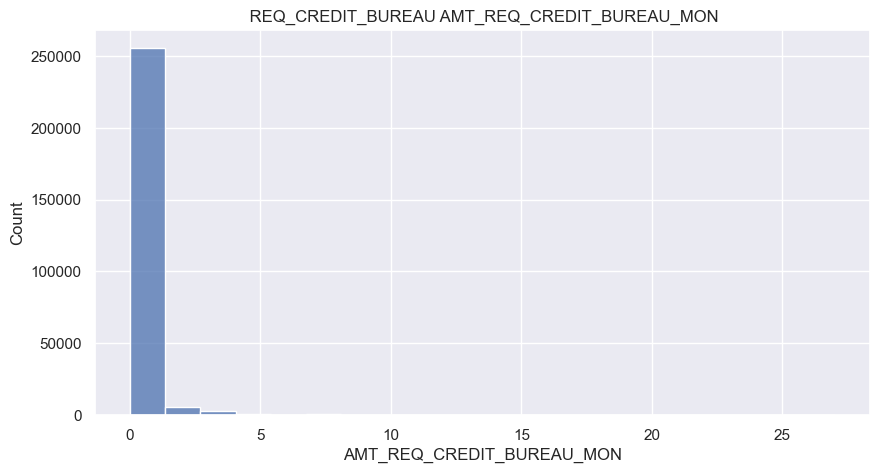

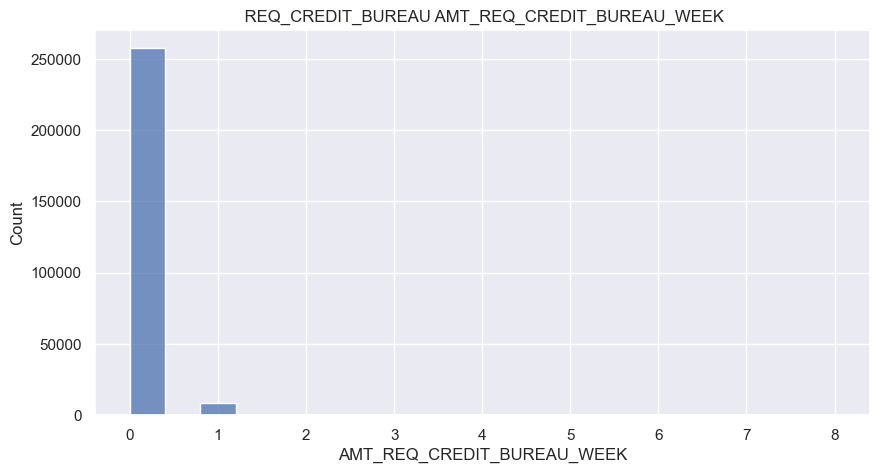

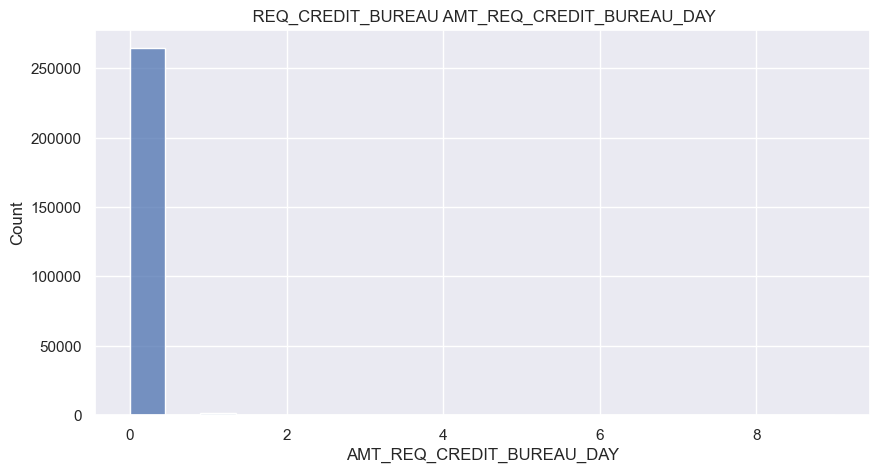

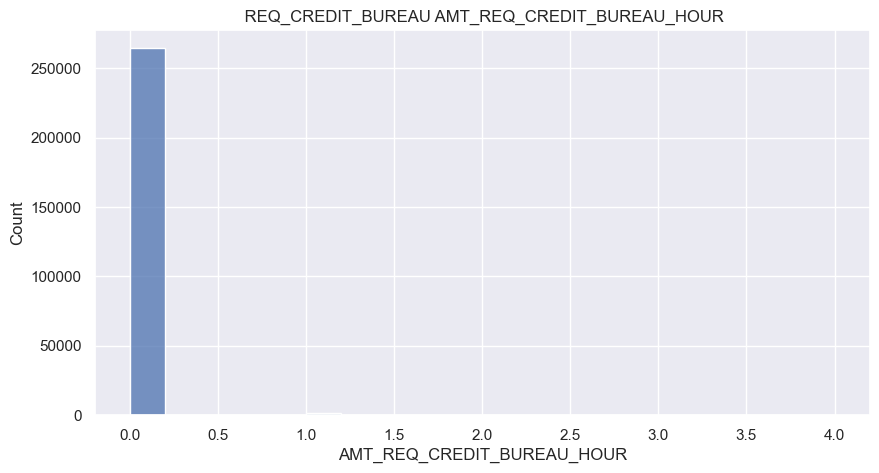

In [41]:

cont_cols = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 
             'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']

for i in cont_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(AppDf[i])
    plt.title(" REQ_CREDIT_BUREAU "+i)
    plt.show()

-  As we can see that, the values are only integers, either 0,1,2 or something else. If we replace, we will replace by mode    value and not mean value because median value will give an decimal value.

  
-  And also, mostly the values are 0's.


-  So, we can ignore this column.


-  This column is mostly acting as a constant and has no variation. 

   
-  Again, we can ignore this column or we can drop it

In [42]:
AppDf = AppDf.drop(columns = REQ_CREDIT_BUREAU.columns)


In [43]:
(AppDf.isnull().mean()*100).sort_values(ascending = False).head(20)

OCCUPATION_TYPE             31.345545
EXT_SOURCE_3                19.825307
NAME_TYPE_SUITE              0.420148
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
FLAG_DOCUMENT_3              0.000000
FLAG_DOCUMENT_2              0.000000
SK_ID_CURR                   0.000000
FLAG_DOCUMENT_5              0.000000
ORGANIZATION_TYPE            0.000000
LIVE_CITY_NOT_WORK_CITY      0.000000
FLAG_DOCUMENT_4              0.000000
FLAG_DOCUMENT_7              0.000000
dtype: float64

In [44]:
AppDf.shape

(307511, 67)

In [45]:
# OCCUPATION_TYPE :  

In [46]:
AppDf.OCCUPATION_TYPE.head(10)

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [47]:
AppDf.OCCUPATION_TYPE.index

RangeIndex(start=0, stop=307511, step=1)

In [48]:
len(AppDf.OCCUPATION_TYPE)

307511

In [49]:
AppDf.OCCUPATION_TYPE.values

array(['Laborers', 'Core staff', 'Laborers', ..., 'Managers', 'Laborers',
       'Laborers'], dtype=object)

In [50]:
AppDf.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [51]:
AppDf.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [52]:
AppDf.OCCUPATION_TYPE.value_counts().sum()

211120

In [53]:
AppDf.OCCUPATION_TYPE.isnull().sum()

96391

In [54]:
# we can see that, OCCUPATION_TYPE columns has 31 % missing data and more than 96K values are missing,

# and its also a very high in numbers , 

# but when we look at the column , so it looks important and we can not remove it,

# so we can plot a graph first

<function matplotlib.pyplot.show(close=None, block=None)>

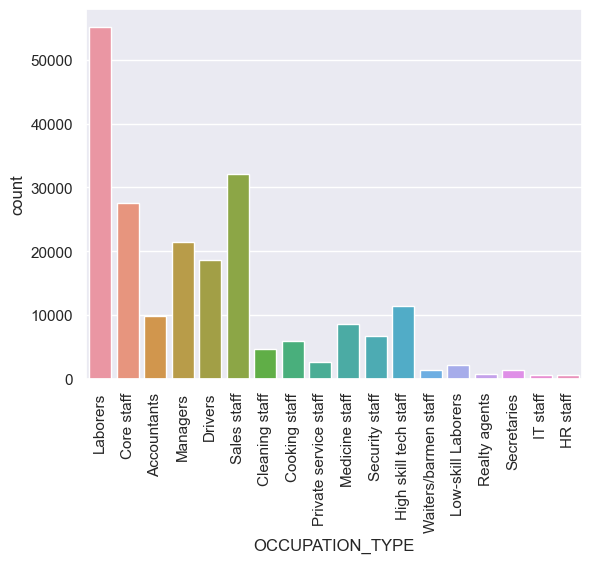

In [55]:
# This is Catogorical column , here we can use CountPlot for this

sns.countplot(x= 'OCCUPATION_TYPE', data = AppDf)
plt.xticks(rotation=90)
plt.show

In [56]:
# It is a Catagorical column and we can only replace with mode value, 

# but replacing all those 31 % missing with "labour" class not good,

# so we can fill it with Unknown / NA

In [57]:
AppDf["OCCUPATION_TYPE"] = AppDf["OCCUPATION_TYPE"].fillna("Unknown")

In [58]:
AppDf.OCCUPATION_TYPE.isnull().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

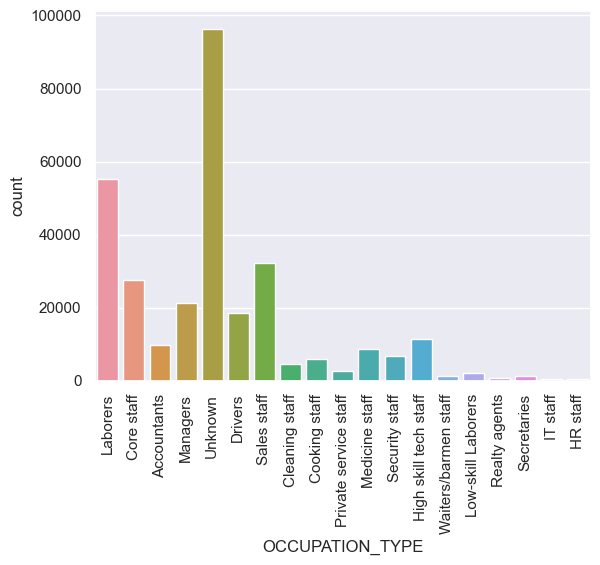

In [59]:
sns.countplot(x= 'OCCUPATION_TYPE', data = AppDf)
plt.xticks(rotation=90)
plt.show

In [60]:
# EXT_SOURCE_3 :

# We have two External source data i.e., EXT_SOURCE_2','EXT_SOURCE_3

In [61]:
AppDf[['EXT_SOURCE_2','EXT_SOURCE_3']].head(10)

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.262949,0.139376
1,0.622246,NaN
2,0.555912,0.729567
3,0.650442,NaN
4,0.322738,NaN
5,0.354225,0.621226
6,0.724000,0.492060
7,0.714279,0.540654
8,0.205747,0.751724
9,0.746644,NaN


In [62]:
AppDf[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_2      660
EXT_SOURCE_3    60965
dtype: int64

In [63]:
AppDf[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,3.068510e+05,246546.000000
mean,5.143927e-01,0.510853
std,1.910602e-01,0.194844
min,8.173617e-08,0.000527
25%,3.924574e-01,0.370650
50%,5.659614e-01,0.535276
75%,6.636171e-01,0.669057
max,8.549997e-01,0.896010


In [64]:
AppDf[['EXT_SOURCE_2','EXT_SOURCE_3']].mode()

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.285898,0.7463


In [65]:
# Replace those missing values of External Sources with median values

AppDf.EXT_SOURCE_2 = AppDf.EXT_SOURCE_2.fillna(AppDf['EXT_SOURCE_2'].median())

AppDf.EXT_SOURCE_3 = AppDf.EXT_SOURCE_3.fillna(AppDf['EXT_SOURCE_3'].median())

In [66]:
AppDf[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

In [67]:
# Observation of client's social surroundings : 

In [68]:
AppDf[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [69]:
# Making a list of all variables to client's social surroundings

SOCIAL_CIRCLE = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [70]:
SOCIAL_CIRCLE

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [71]:
# Replacing the missing values with median values for the social surroundings list as above

AppDf.fillna(AppDf[SOCIAL_CIRCLE].median(),inplace = True)

In [72]:
AppDf[SOCIAL_CIRCLE].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [73]:
# NAME_TYPE_SUITE :

In [74]:
AppDf.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [75]:
AppDf.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [76]:
# Replacing the null values by mode as this a categorical variable

AppDf["NAME_TYPE_SUITE"] = AppDf.NAME_TYPE_SUITE.fillna(AppDf.NAME_TYPE_SUITE.mode()[0])

In [77]:
AppDf["NAME_TYPE_SUITE"].isnull().sum()

0

In [78]:
AppDf.isnull().sum().sort_values(ascending=False) 

AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
FLAG_DOCUMENT_3                  0
                              ... 
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_DOCUMENT_21                 0
Length: 67, dtype: int64

In [79]:
AppDf.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

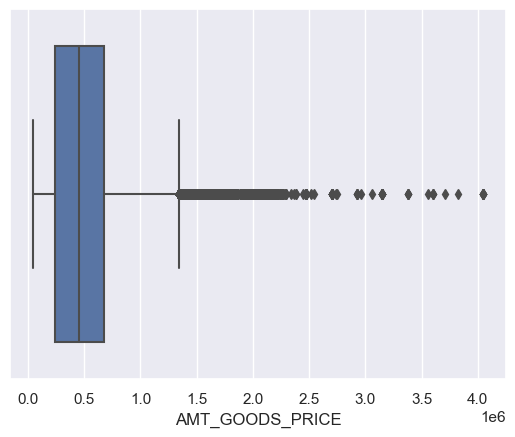

In [80]:
sns.boxplot(AppDf.AMT_GOODS_PRICE)
plt.show()

In [81]:
AppDf.AMT_GOODS_PRICE.quantile([0.5,0.7,0.9,0.95,0.99,1])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [82]:
AppDf['AMT_GOODS_PRICE'].median()

450000.0

In [83]:
# checking how close the value of price of goods and loan taken

AppDf[["AMT_GOODS_PRICE",'AMT_CREDIT']]

,AMT_GOODS_PRICE,AMT_CREDIT
0,351000.0,406597.5
1,1129500.0,1293502.5
2,135000.0,135000.0
3,297000.0,312682.5
4,513000.0,513000.0
...,...,...
307506,225000.0,254700.0
307507,225000.0,269550.0
307508,585000.0,677664.0
307509,319500.0,370107.0


-  Observaion :


Imputing null values with AMT_CREDIT based on the assumption that the amount of loan taken is equal to the amount of goods purchase

In [84]:
AppDf["AMT_GOODS_PRICE"] = AppDf.AMT_GOODS_PRICE.fillna(AppDf['AMT_GOODS_PRICE'] == AppDf['AMT_CREDIT'])

In [85]:
AppDf["AMT_GOODS_PRICE"].isnull().sum()

0

In [86]:
AppDf["AMT_GOODS_PRICE"]

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: object

In [87]:
AppDf["AMT_GOODS_PRICE"] = AppDf["AMT_GOODS_PRICE"].astype(float)

In [88]:
AppDf["AMT_GOODS_PRICE"]

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [89]:
AppDf.CNT_FAM_MEMBERS.median()

2.0

In [90]:
AppDf["CNT_FAM_MEMBERS"] = AppDf.CNT_FAM_MEMBERS.fillna(AppDf.CNT_FAM_MEMBERS.median())

In [91]:
AppDf['DAYS_LAST_PHONE_CHANGE']

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [92]:
AppDf['DAYS_LAST_PHONE_CHANGE'] = AppDf['DAYS_LAST_PHONE_CHANGE'].abs()

AppDf["DAYS_LAST_PHONE_CHANGE"] = AppDf["DAYS_LAST_PHONE_CHANGE"].fillna("NA")

In [93]:
AppDf["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

0

In [94]:
AppDf.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

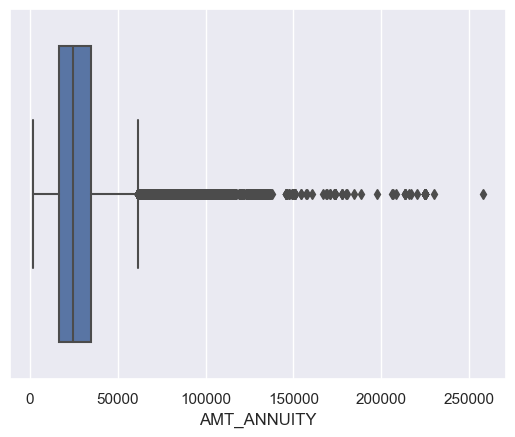

In [95]:
sns.boxplot(AppDf.AMT_ANNUITY)
plt.show()

In [96]:
AppDf.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [97]:
AppDf.AMT_ANNUITY = AppDf.AMT_ANNUITY.fillna(AppDf.AMT_ANNUITY.median())

In [98]:
AppDf.isnull().sum().sort_values(ascending=False).head(10)

SK_ID_CURR                  0
FLAG_DOCUMENT_5             0
REG_CITY_NOT_LIVE_CITY      0
REG_CITY_NOT_WORK_CITY      0
LIVE_CITY_NOT_WORK_CITY     0
ORGANIZATION_TYPE           0
EXT_SOURCE_2                0
EXT_SOURCE_3                0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
dtype: int64

### Standardizing Numrical values

In [99]:
# Days Birth

In [100]:
AppDf['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [101]:
AppDf[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
5,-16941,-1588,-4970.0,-477
6,-13778,-3130,-1213.0,-619
7,-18850,-449,-4597.0,-2379
8,-20099,365243,-7427.0,-3514
9,-14469,-2019,-14437.0,-3992


In [102]:
# Convert This Negative value into positive

AppDf[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']] = AppDf[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].abs()


In [103]:
AppDf[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
5,16941,1588,4970.0,477
6,13778,3130,1213.0,619
7,18850,449,4597.0,2379
8,20099,365243,7427.0,3514
9,14469,2019,14437.0,3992


In [104]:
AppDf[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].isnull().sum()

DAYS_BIRTH           0
DAYS_EMPLOYED        0
DAYS_REGISTRATION    0
DAYS_ID_PUBLISH      0
dtype: int64

In [105]:
AppDf['DAYS_BIRTH'] = round(AppDf['DAYS_BIRTH']/365, 0)
AppDf['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [106]:
# Renaming the DAYS_BIRTH TO CLIENTS_AGE for better view

AppDf.columns = AppDf.columns.str.replace("DAYS_BIRTH", "CLIENTS_AGE")

In [107]:
AppDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [108]:
# After, removing and imputing the missing value for Current Application Dataset

# Now, go for Target Variable

###  Target Variable


In [109]:
AppDf['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [110]:
# Client with payment difficulties represent as "O" 

# Cliets who pay their payments on time represent as "1" 


In [111]:
(AppDf['TARGET']==0).sum()

282686

In [112]:
(AppDf['TARGET']==1).sum()

24825

In [113]:
(AppDf['TARGET']==0).sum()/(AppDf['TARGET']==1).sum()

11.387150050352467

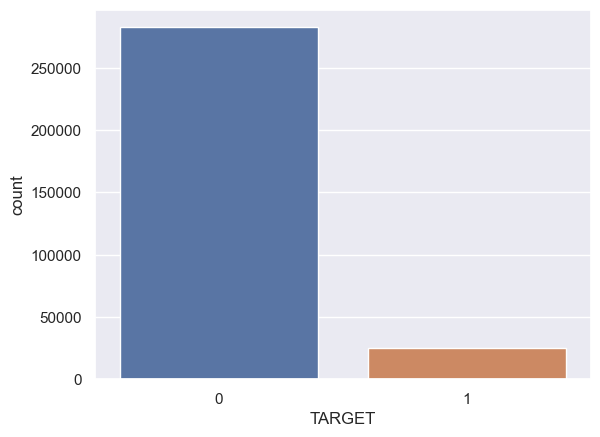

In [114]:
sns.countplot(x = "TARGET", data = AppDf)
plt.show()

- Here we can see that Data is Imbalance

In [115]:
TARGET_0 = AppDf[(AppDf['TARGET']==0)]

In [116]:
TARGET_1 = AppDf[(AppDf['TARGET']==1)]

In [117]:
# We can assign different variable for target 0 & 1 for further analysis

In [118]:
AppDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [119]:
AppDf.select_dtypes(include= object).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,1134.0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,828.0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,815.0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,617.0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,1106.0


In [120]:
AppDf.select_dtypes(include= float).head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CLIENTS_AGE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,202500.0,406597.5,24700.5,351000.0,0.018801,26.0,3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,46.0,1186.0,2.0,0.622246,0.535276,1.0,0.0,1.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,52.0,4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,9833.0,2.0,0.650442,0.535276,2.0,0.0,2.0,0.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,55.0,4311.0,1.0,0.322738,0.535276,0.0,0.0,0.0,0.0


In [121]:
AppDf.select_dtypes(include= int).head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,637,2120,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,1188,291,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,225,2531,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,3039,2437,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,3038,3458,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
categorical_column = AppDf.select_dtypes(include= object)

In [123]:
numerical_column = AppDf.select_dtypes(include= float).head()

In [124]:
categorical_column.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [125]:
numerical_column.columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CLIENTS_AGE', 'DAYS_REGISTRATION',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [126]:
categorical_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [127]:
numerical_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CLIENTS_AGE', 'CNT_FAM_MEMBERS']

In [128]:
# For Univariate and Bivariate Analysis, choosing only those columns which is more important for this Data

## Analysis of Variables 

### Univariate Analysis

- **On Categorical Data**

In [129]:
categorical_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

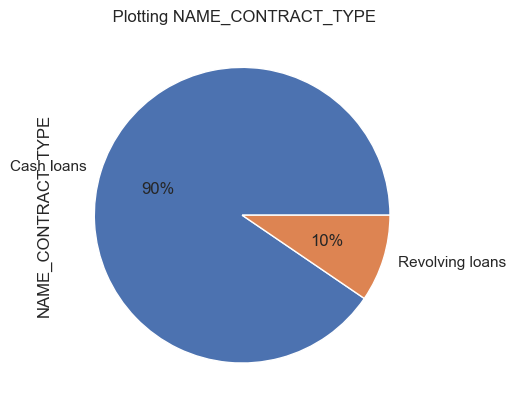

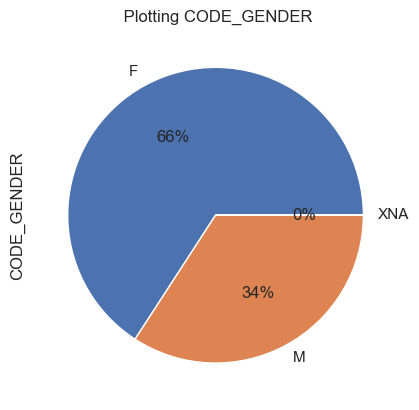

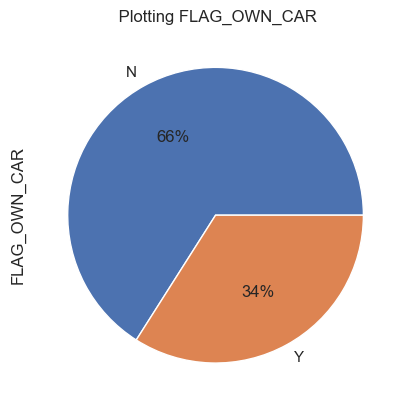

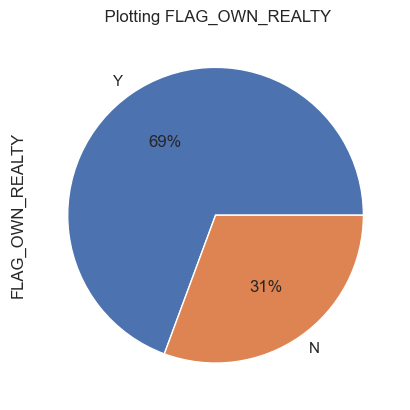

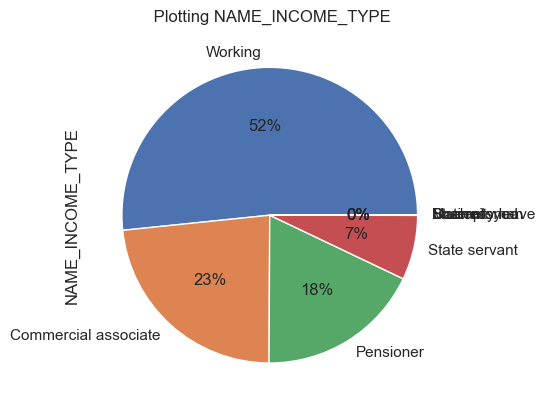

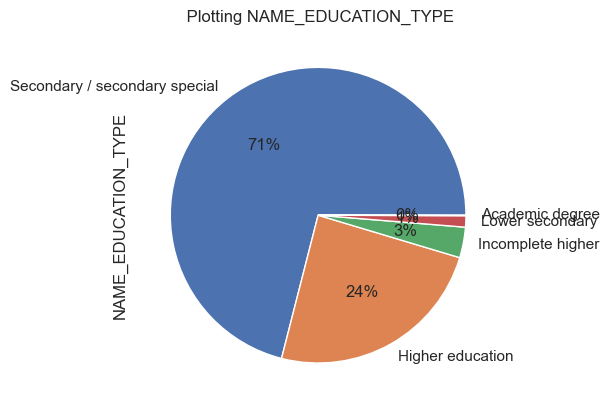

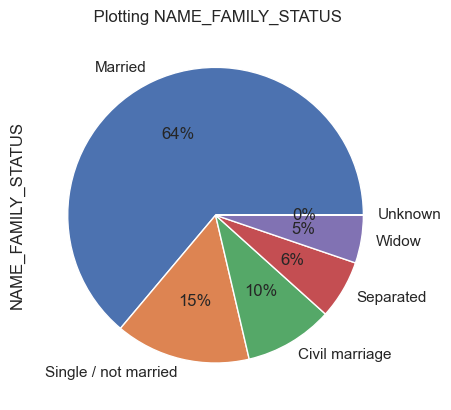

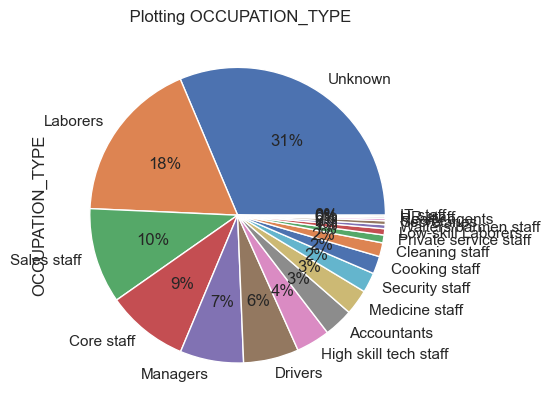

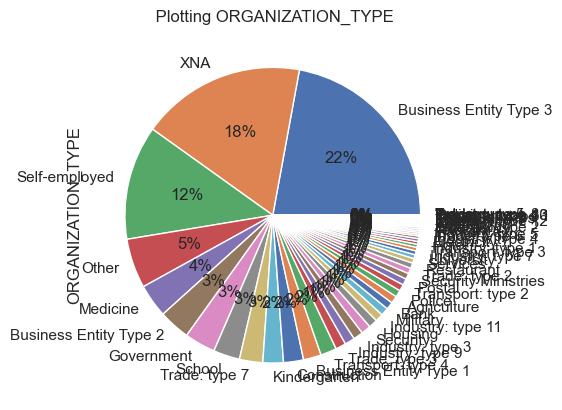

In [130]:
for i in categorical_col:
    AppDf[i].value_counts().plot.pie(autopct = "%1.0f%%")
    plt.title(" Plotting "+i)
    plt.show()

- 

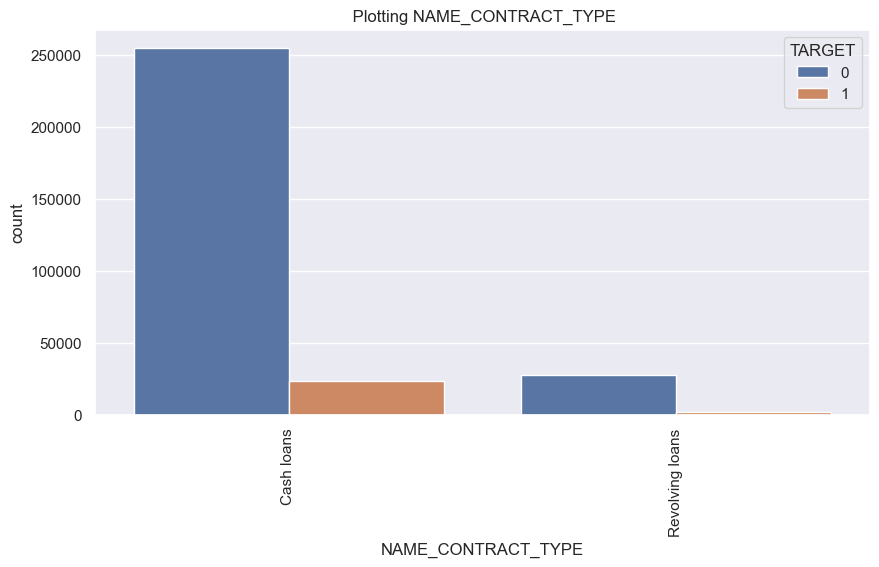

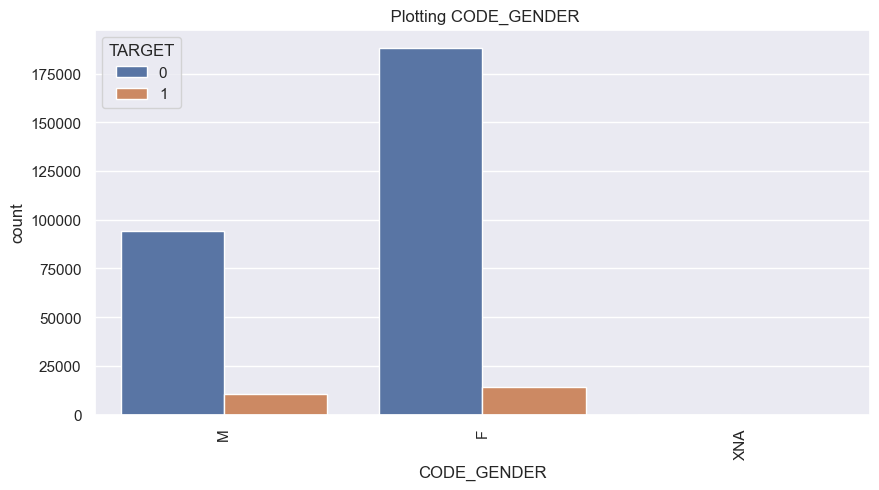

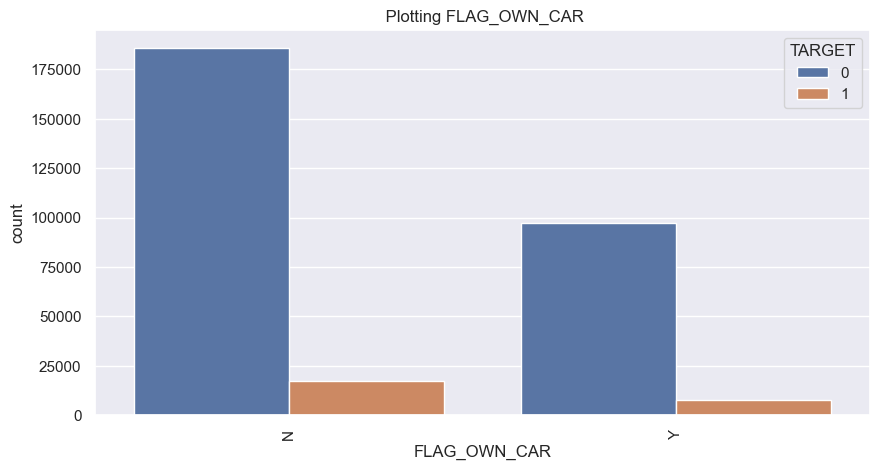

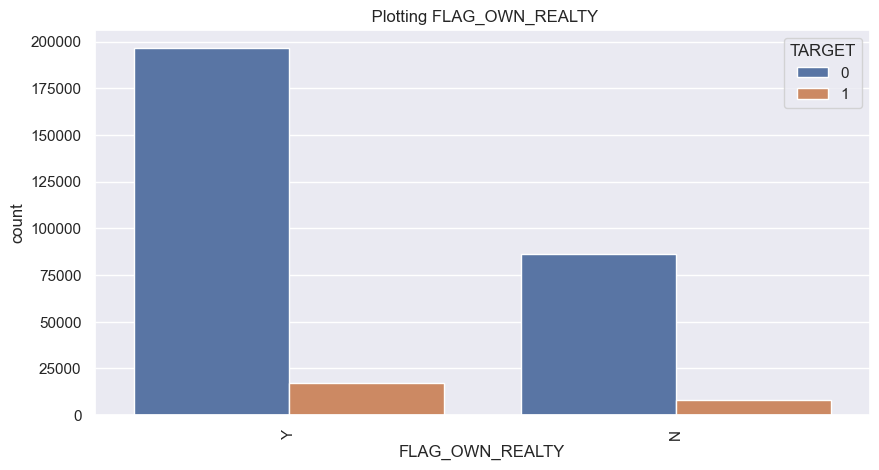

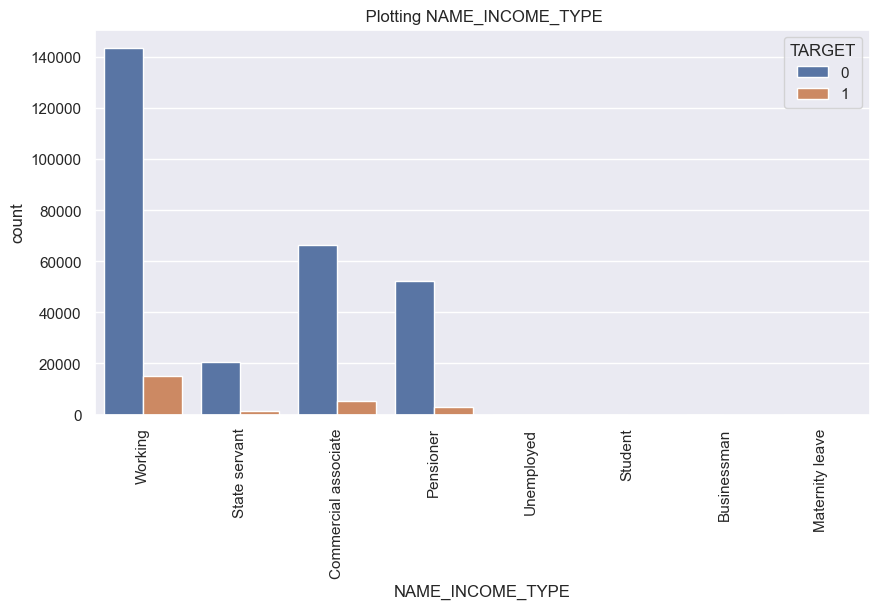

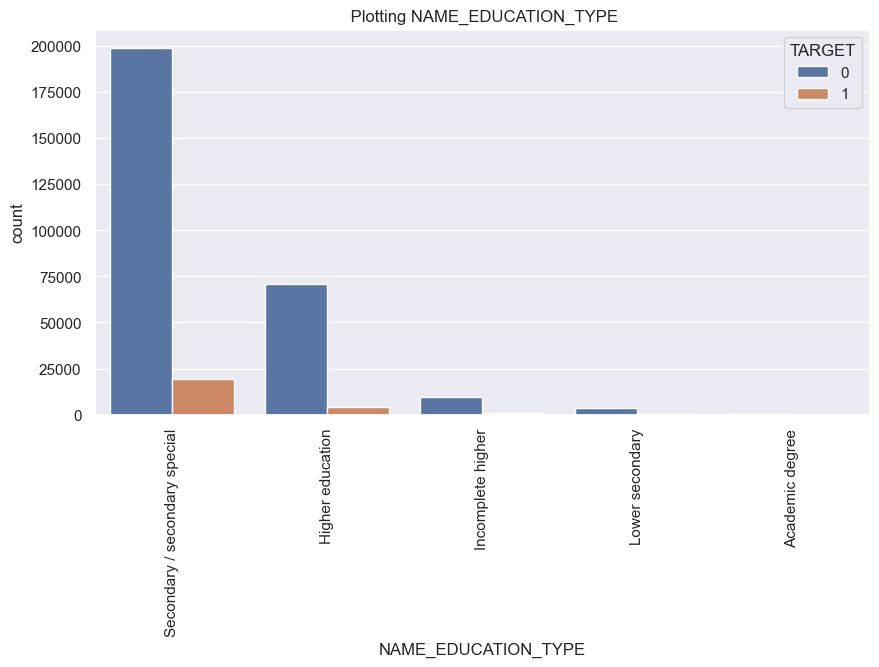

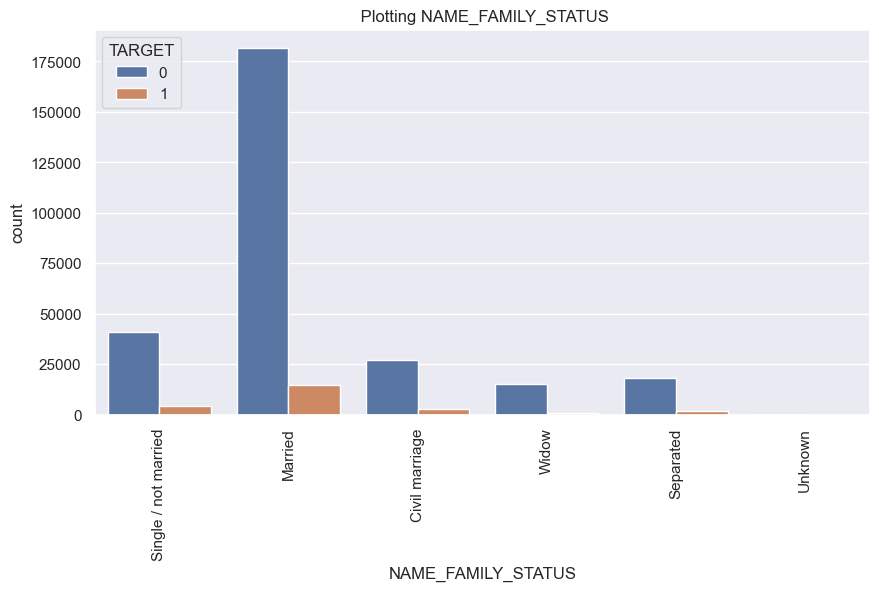

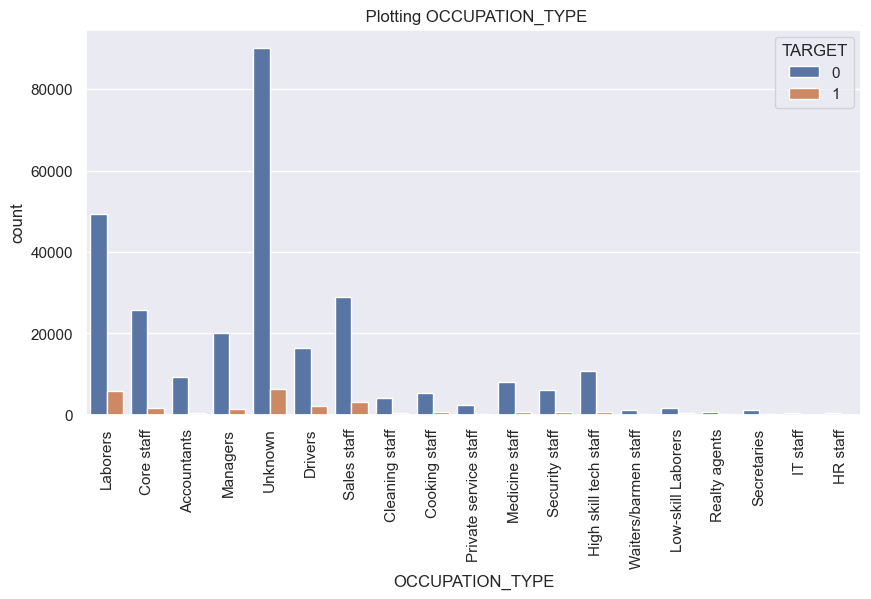

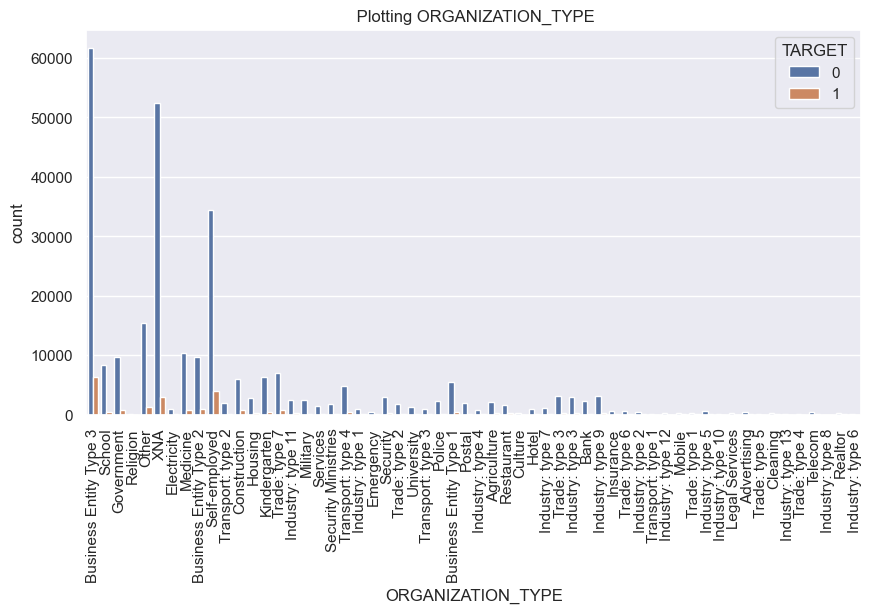

In [131]:
for i in categorical_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x=AppDf[i], hue = AppDf['TARGET'])
    plt.title(" Plotting "+i)
    plt.xticks(rotation=90)
    plt.show()

- 

- **On Numerical Data**

In [132]:
numerical_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CLIENTS_AGE',
 'CNT_FAM_MEMBERS']

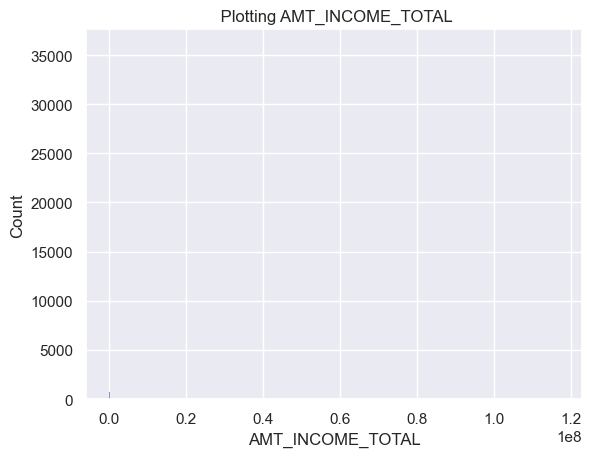

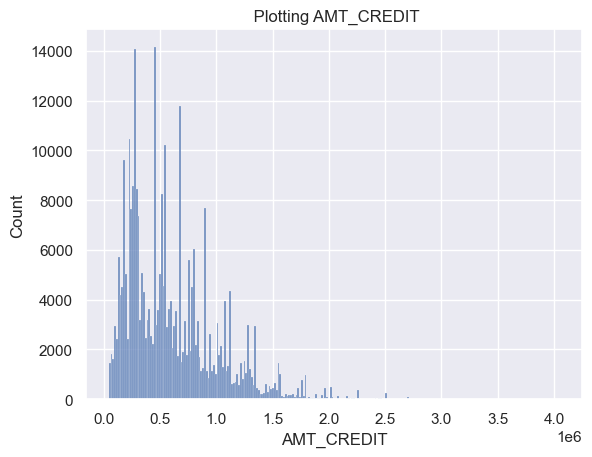

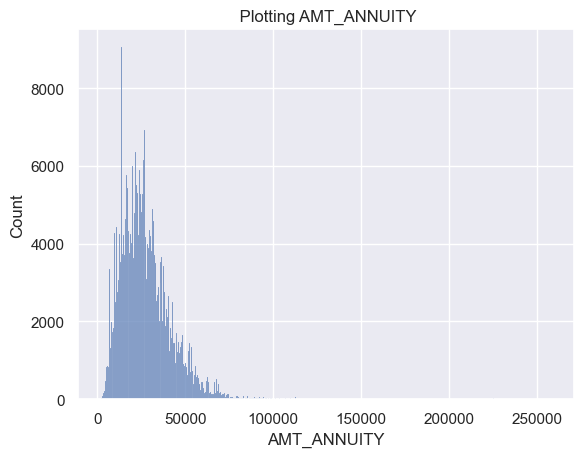

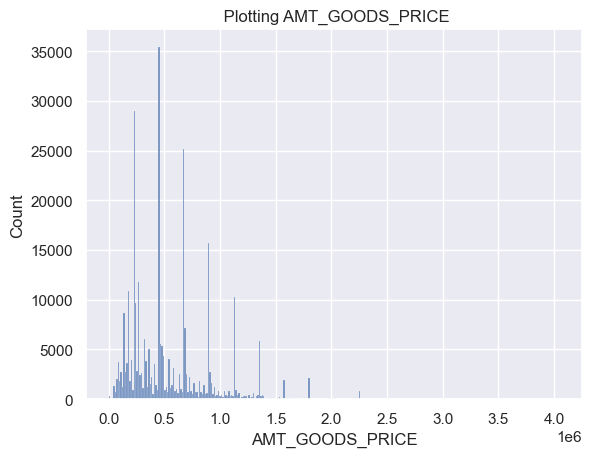

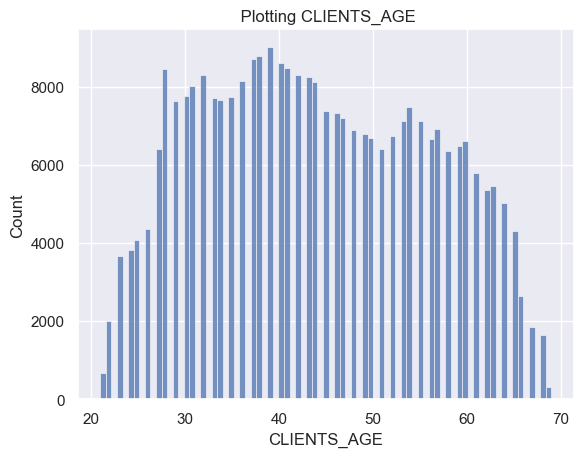

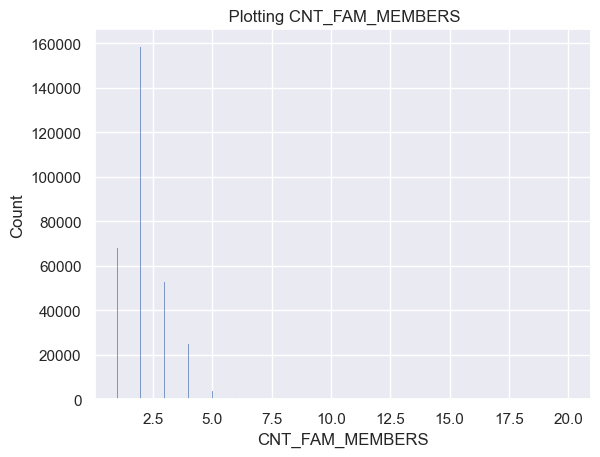

In [133]:
for i in numerical_col:
    sns.histplot(AppDf[i])
    plt.title(" Plotting "+i)
    plt.show()

- 

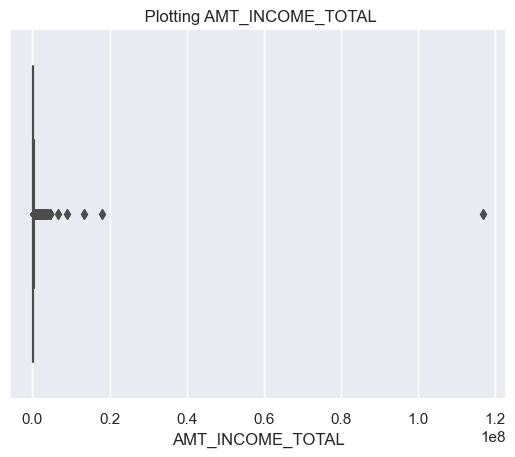

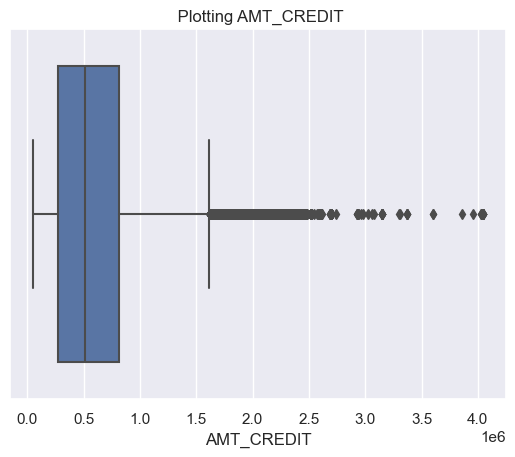

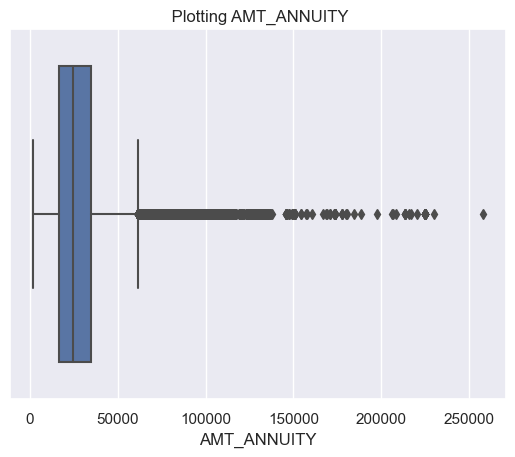

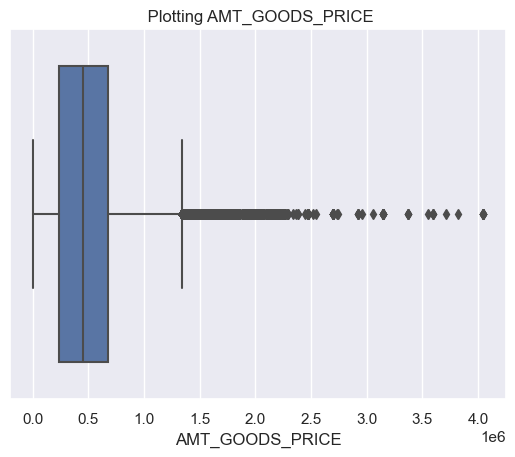

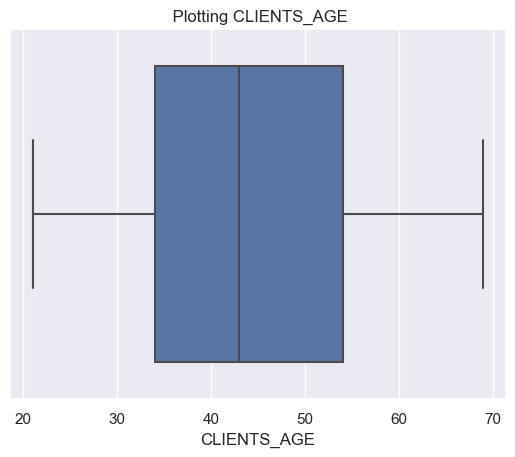

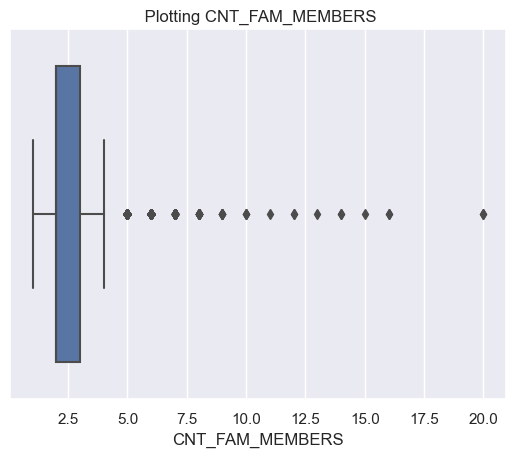

In [134]:
for i in numerical_col:
    sns.boxplot(AppDf[i])
    plt.title(" Plotting "+i)
    plt.show()

-  

In [135]:
AppDf.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [136]:
AppDf.AMT_INCOME_TOTAL.max() # Income more than 1 crore

117000000.0

In [137]:
AppDf[AppDf['AMT_INCOME_TOTAL']>10000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0,0,0,0,0,0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,0,0,0,0,0,0
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,0,0,0,0,0,0


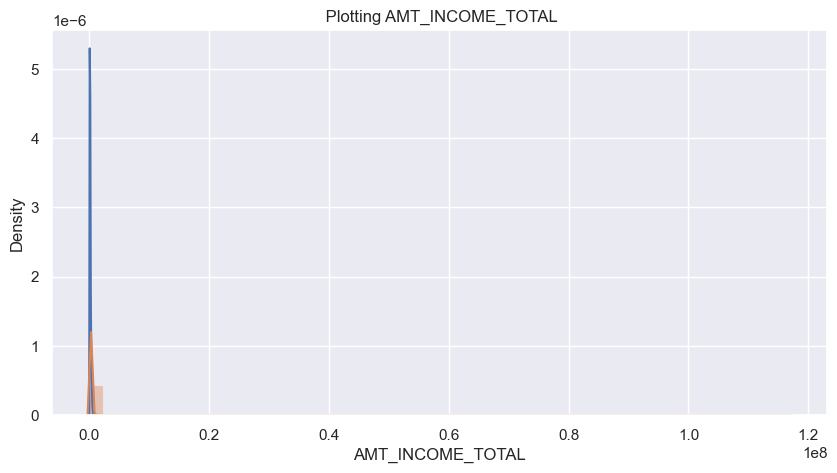

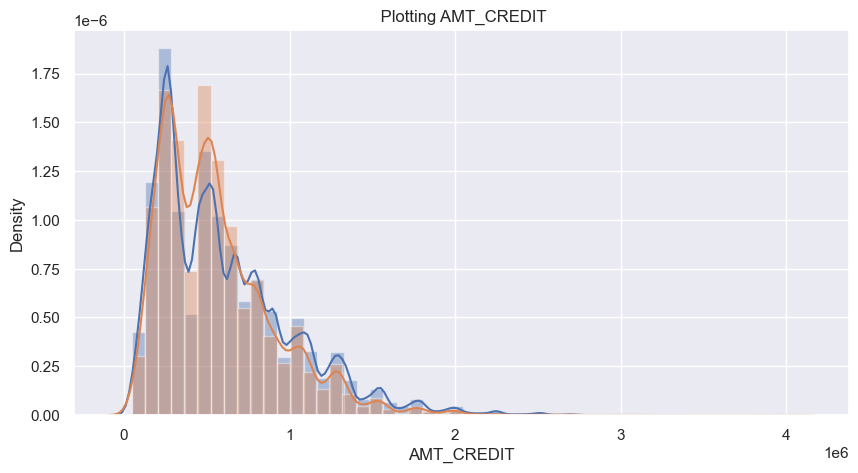

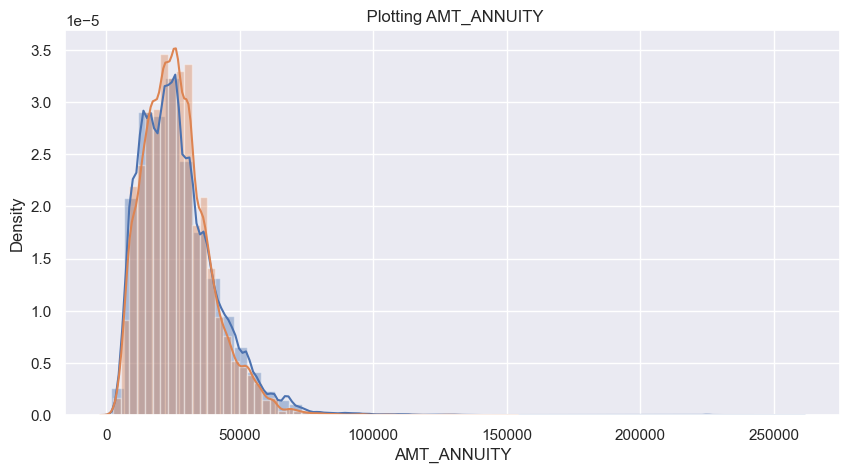

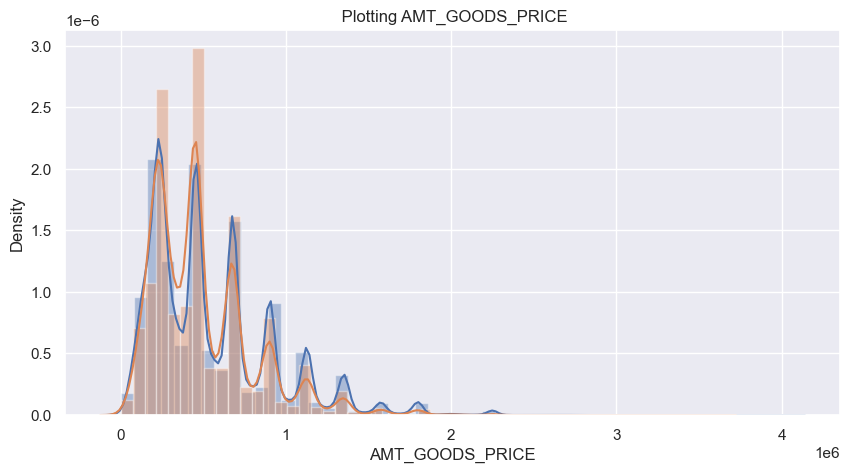

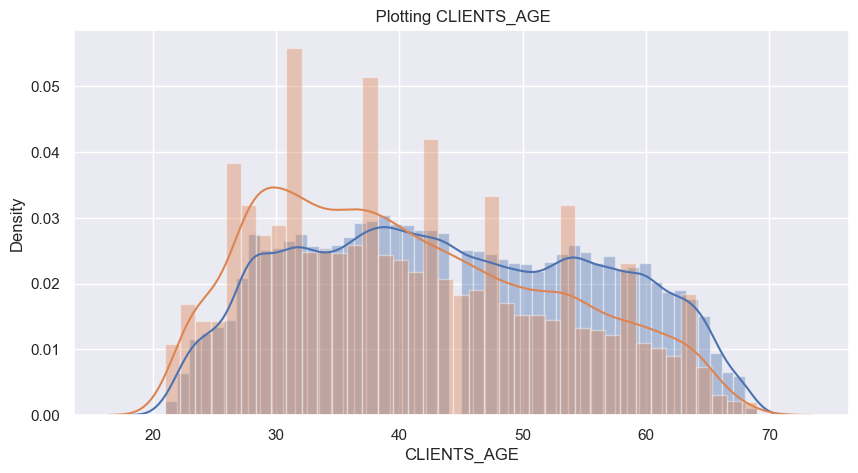

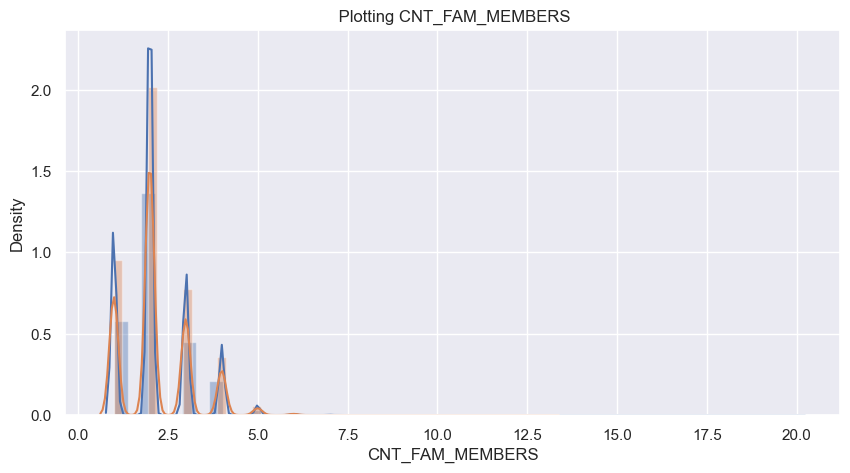

In [138]:
for i in numerical_col:
    plt.figure(figsize=(10,5))
    sns.distplot(TARGET_0[i], label='0')
    sns.distplot(TARGET_1[i],  label='1')
    plt.title(" Plotting "+i)
    plt.show()

### Bivariate Analysis

In [139]:
numerical_col

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CLIENTS_AGE',
 'CNT_FAM_MEMBERS']

In [140]:
categorical_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [141]:
AppDf['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

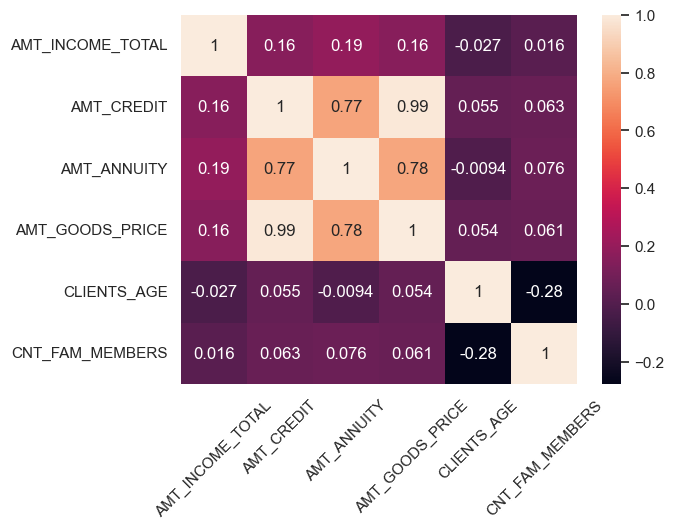

In [142]:
sns.heatmap(AppDf[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                  'AMT_GOODS_PRICE','CLIENTS_AGE','CNT_FAM_MEMBERS']].corr(), annot=True)
plt.xticks(rotation=45)
plt.show

In [143]:
def plotting(Var1, Var2):
    
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    sns.scatterplot(data= TARGET_0, x= Var1, y= Var2)
    plt.title('Target 0')

    plt.subplot(1,2,2)
    sns.scatterplot(data= TARGET_1, x= Var1, y= Var2)
    plt.title('Target 1')

    plt.tight_layout()
    plt.show()
    

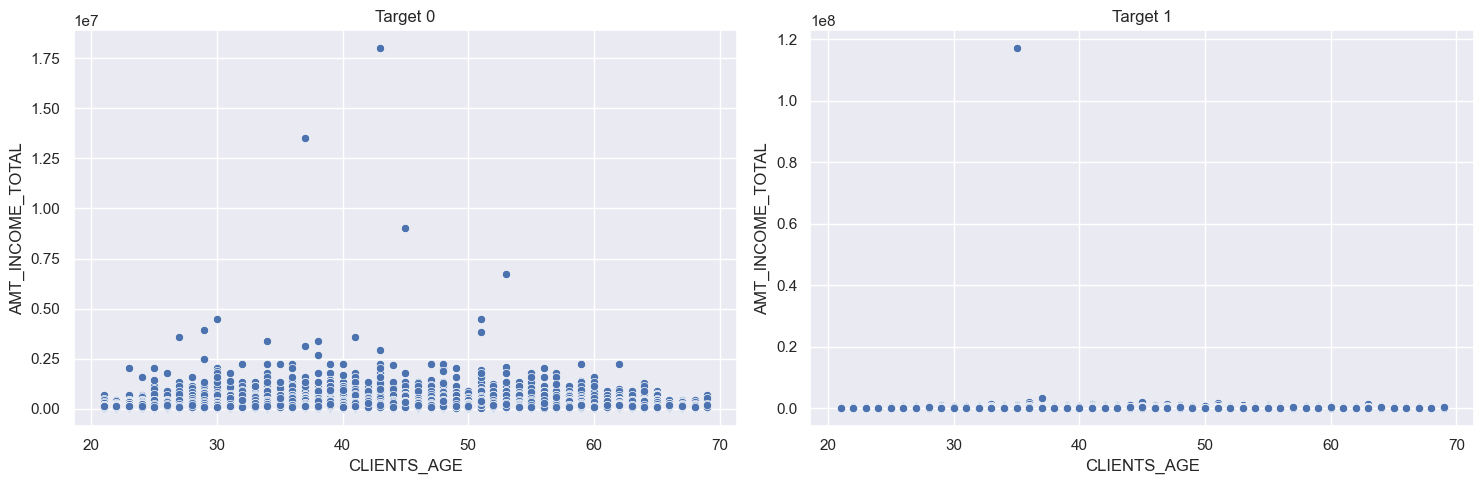

In [144]:
plotting('CLIENTS_AGE','AMT_INCOME_TOTAL')

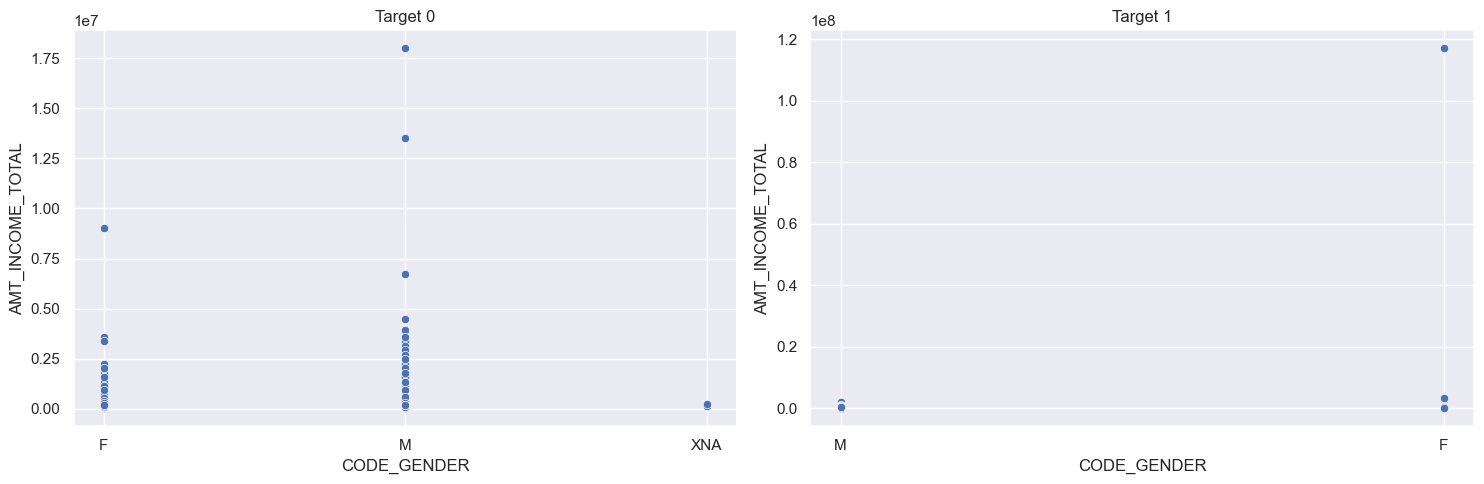

In [145]:
plotting('CODE_GENDER','AMT_INCOME_TOTAL')

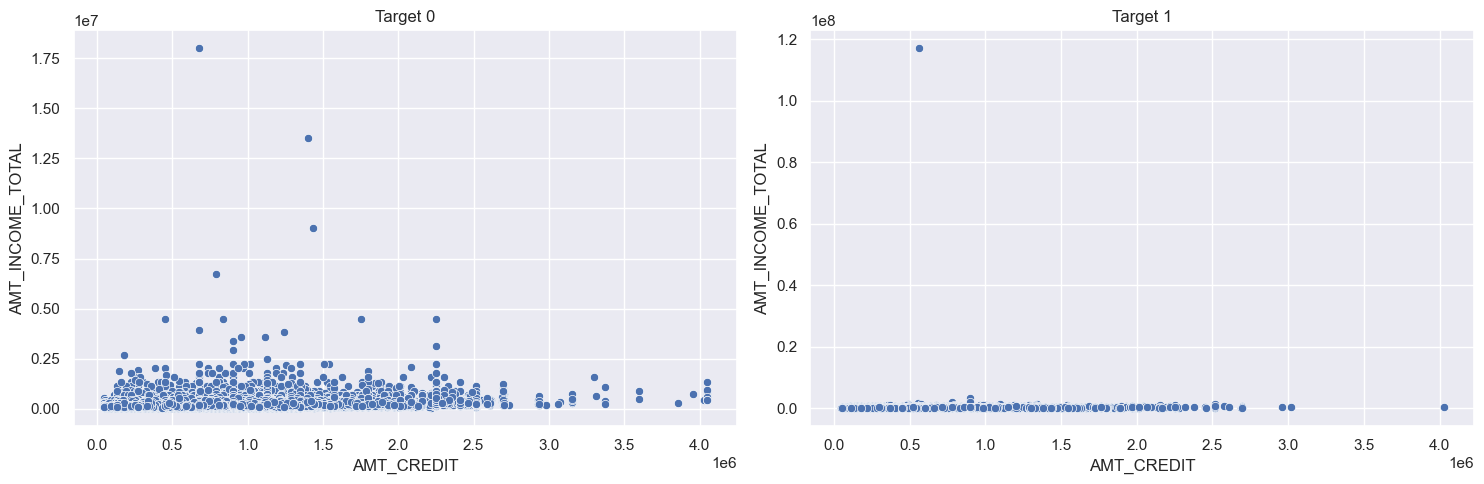

In [146]:
plotting('AMT_CREDIT','AMT_INCOME_TOTAL')

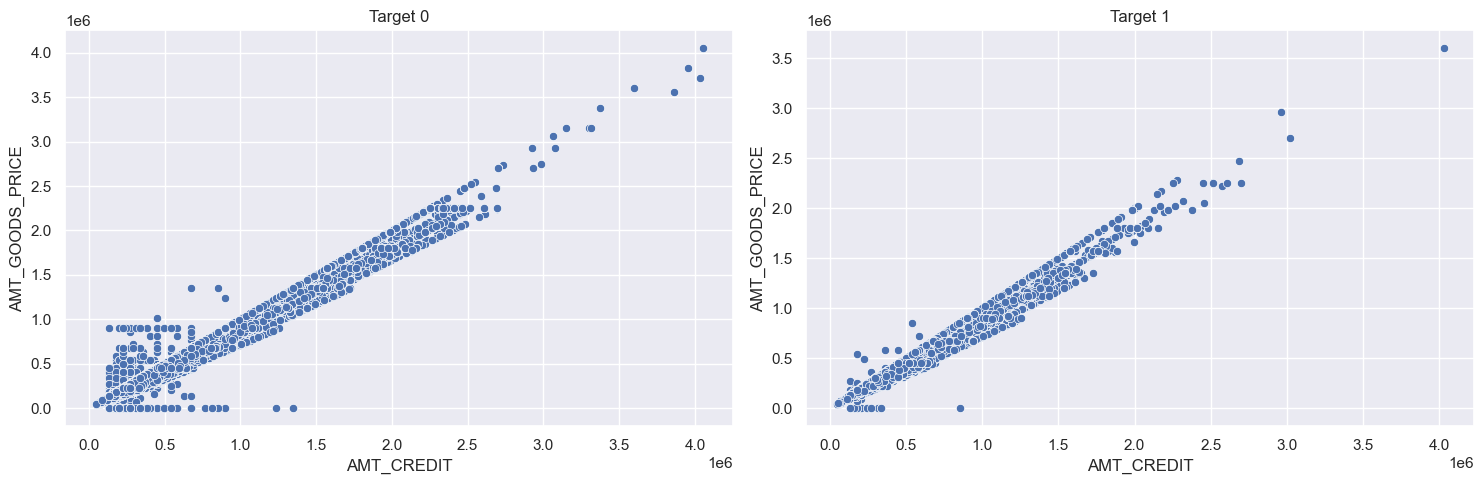

In [147]:
plotting('AMT_CREDIT','AMT_GOODS_PRICE')

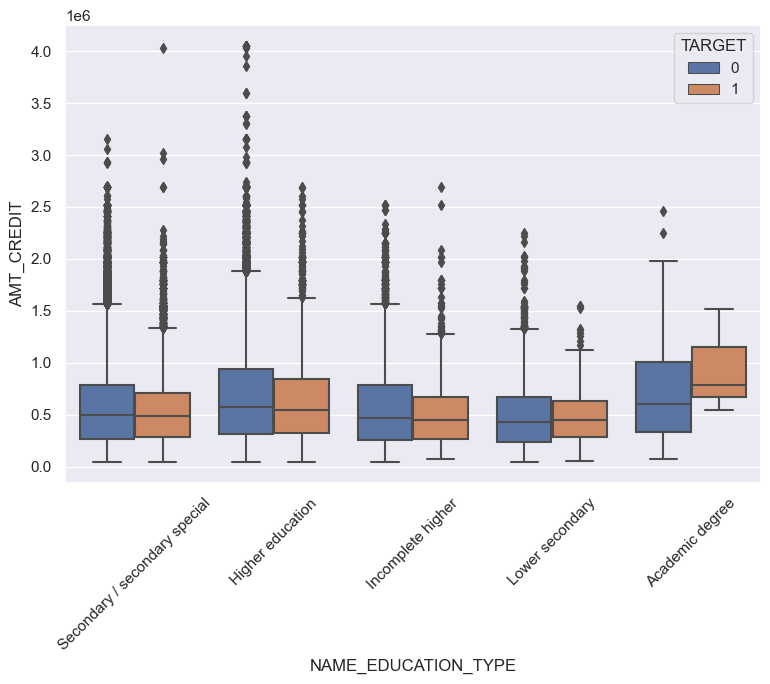

In [148]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,2)
sns.boxplot(data= AppDf, x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT',hue=AppDf['TARGET'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

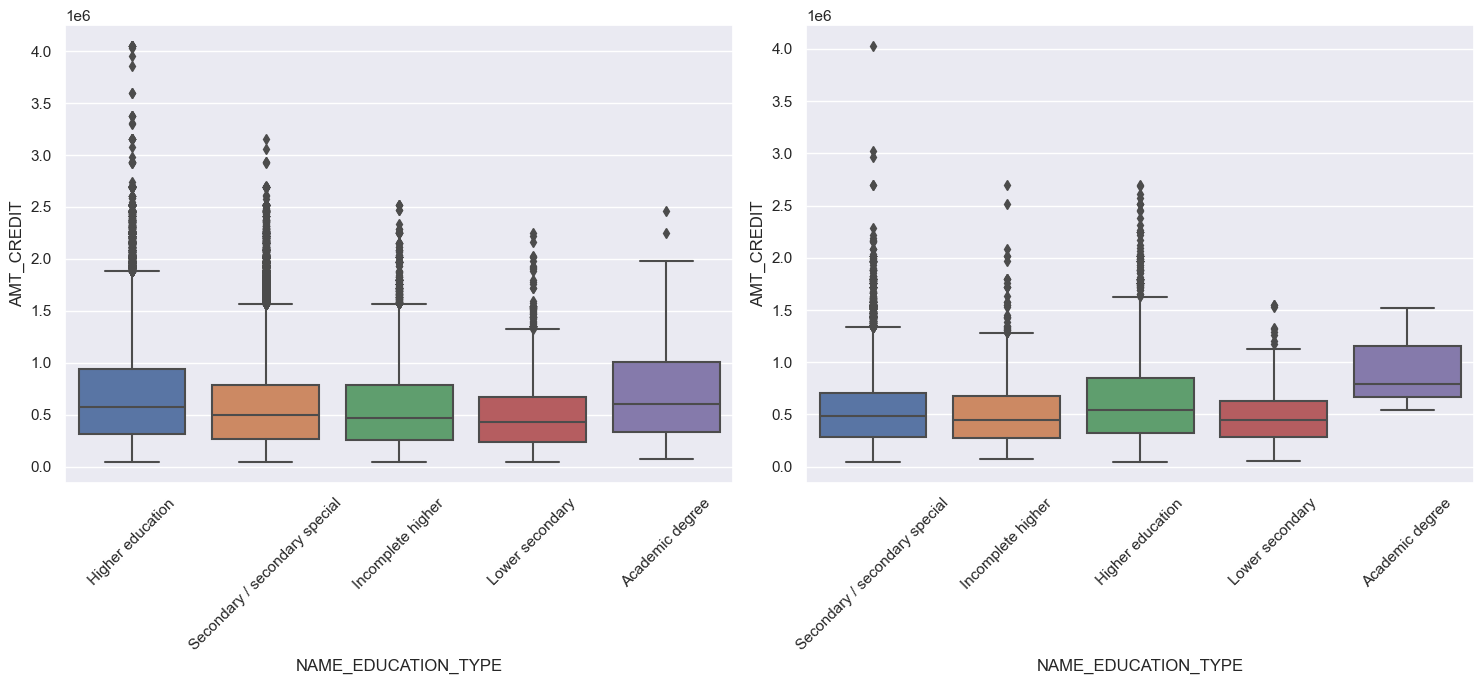

In [149]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_0, x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data= TARGET_1, x= 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [150]:
# Now, Let's move toward Previous Application dataset

#### 2) "previous_application.csv"

In [151]:
df2 = pd.read_csv("previous_application.csv")

In [152]:
df2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [153]:
# # Assigning previus_application_data as dataframe2 = df2

In [154]:
df2.shape

(1670214, 37)

In [155]:
# we can see that , there are 1670214 Indexes and 37 Columns

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [157]:
# data are in float , int , object type : 15 float type columns , 6 int type columns, 16 object type columns

In [158]:
df2.SK_ID_PREV.value_counts().sort_values(ascending=False)     

2030495    1
2273188    1
1784265    1
1383531    1
2315218    1
          ..
2785582    1
1755809    1
2381880    1
2406354    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [159]:
df2.SK_ID_CURR.value_counts().sort_values(ascending=False)

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
216165     1
227530     1
302659     1
116679     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [160]:
# In this dataset there are numbers of dulplicates application in "SK_ID_CURR" column

In [161]:
# Now, go for missing values

In [162]:
df2.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [163]:
(df2.isnull().mean()*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [164]:
missing_values2 = (df2.isnull().mean()*100).sort_values(ascending = False)


In [165]:
missing_values2[missing_values2 > 40].sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [166]:
# Here , the missing value data that lies between 40% - 50 % look important so we drop only those data wich is more than 50%

In [167]:
null2 = missing_values2[missing_values2 > 50].sort_values(ascending=False)

null2

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

In [168]:
null2.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT'],
      dtype='object')

In [169]:
prev_AppDf = df2.drop(columns = null2.index)

prev_AppDf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
prev_AppDf.isnull().sum().sort_values(ascending = False)

NAME_TYPE_SUITE                820405
DAYS_FIRST_DRAWING             673065
DAYS_TERMINATION               673065
DAYS_LAST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_FIRST_DUE                 673065
NFLAG_INSURED_ON_APPROVAL      673065
AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_CURR                          0
CODE_REJECT_REASON                  0
NAME_PAYMENT

In [171]:
(prev_AppDf.isnull().mean()*100).sort_values(ascending = False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

### 3) Merge

In [172]:
newdataframe = AppDf.merge(prev_AppDf, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [173]:
newdataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [174]:
newdataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 99 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413701 non-null  float64
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64
 11  NAME_TYPE_SUITE_x             1413701 non-null  object 
 12  NAME_INCOME_TYPE            

In [175]:
newdata_TARGET_0 = newdataframe[(newdataframe['TARGET']==0)]

In [176]:
newdata_TARGET_1 = newdataframe[(newdataframe['TARGET']==1)]

In [177]:
def Merge_Plot(Var_1,Var_2):

    Merge = newdataframe.pivot_table(values='SK_ID_CURR', index=Var_1, columns=Var_2, aggfunc='count')
    
    Merge = Merge.div(Merge.sum(axis=1),axis='rows')*100
    sns.set()
    Merge.plot(kind='bar',figsize=(15,5))
    
    plt.title(f'Effect Of {Var_1} on Loan Approval')
    plt.xlabel(f'{Var_1}')
    plt.ylabel(f'{Var_2}%')
    plt.show()

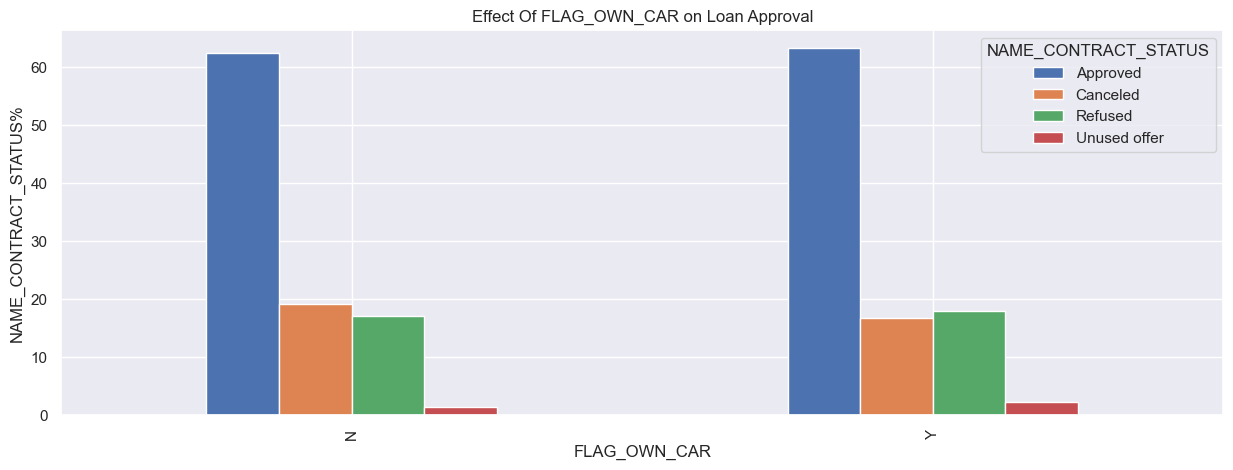

In [178]:
Merge_Plot('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

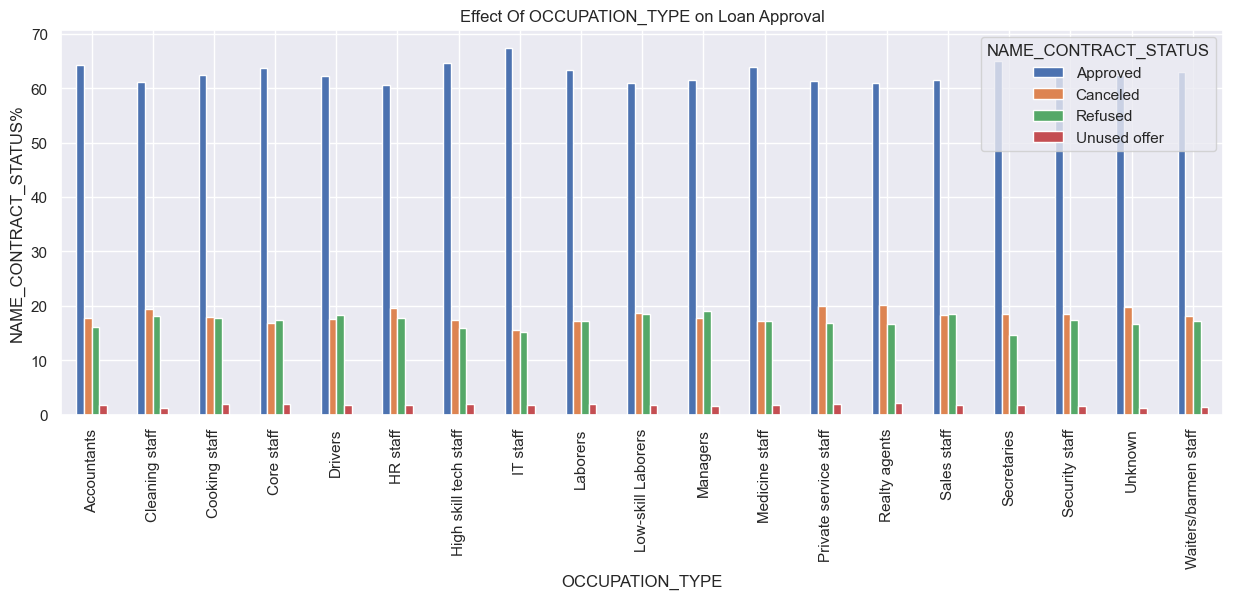

In [179]:
Merge_Plot('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')

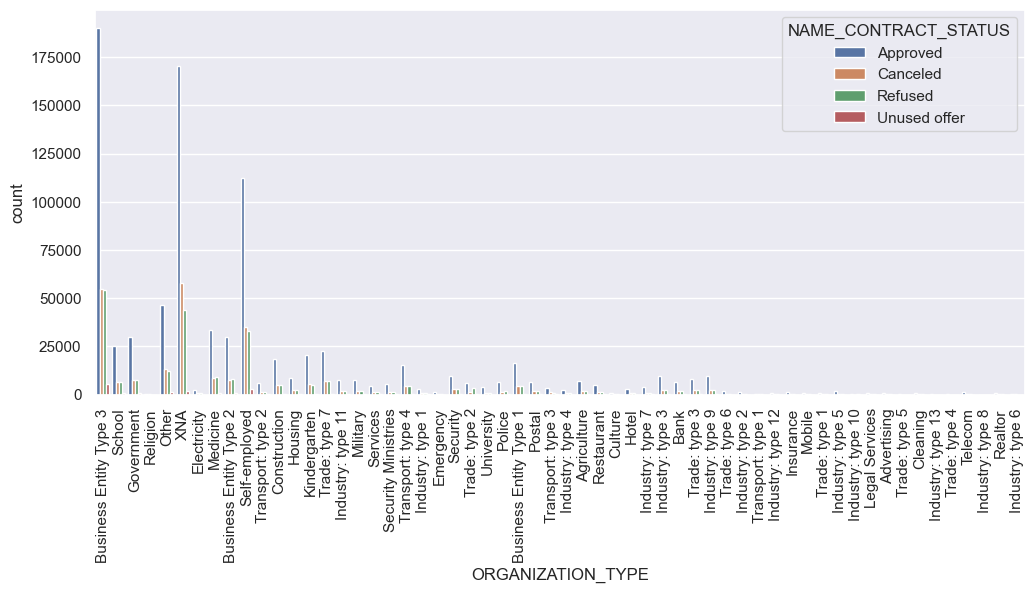

In [180]:
plt.figure(figsize=(12,5))
sns.countplot(x=newdataframe['ORGANIZATION_TYPE'], hue=newdataframe['NAME_CONTRACT_STATUS'], data=newdata_TARGET_0)
plt.xticks(rotation=90)
plt.show()

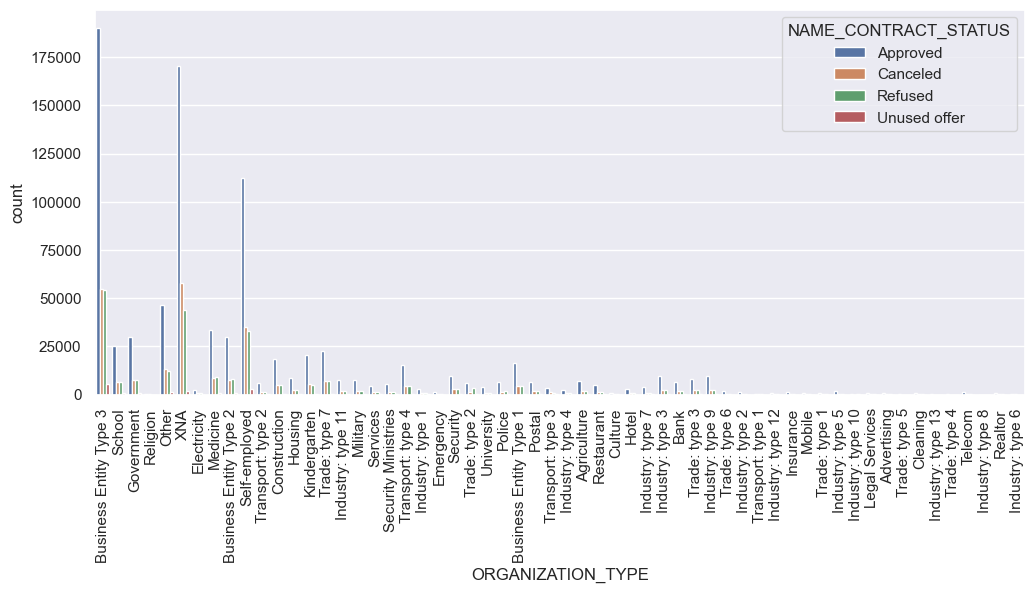

In [181]:
plt.figure(figsize=(12,5))
sns.countplot(x=newdataframe['ORGANIZATION_TYPE'], hue=newdataframe['NAME_CONTRACT_STATUS'], data=newdata_TARGET_1)
plt.xticks(rotation=90)
plt.show()